In [37]:
import pandas as pd
from pyvis.network import Network
import networkx as nx
import math
import copy
import random
import time
import matplotlib.pyplot as plt

In [38]:
#Алгоритм генерации случайного графа в виде матрицы смежности
def generate_matrix():
    size = random.randint(30, 100)
    matrix = [[math.inf for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            if random.randint(0, 5) == 5 and i != j:
                rand_count = random.randint(1, 20)
                matrix[i][j] = rand_count
    return matrix

In [39]:
options = """var options = {
  "edges": {
    "arrows": {
      "to": {
        "enabled": true
      }
    },
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "interaction": {
    "navigationButtons": true
  },
  "physics": {
    "minVelocity": 0.75
  }
}
"""

def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)

In [40]:
#создание графа, используя матрицу смежности
def create_graph(matrix : list) -> nx.DiGraph:
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                graph.add_edge(i + 1, j + 1, weight=matrix[i][j], label=matrix[i][j])
    for edge in graph.edges():
        graph.edges[edge]['color'] = 'blue'
    return graph

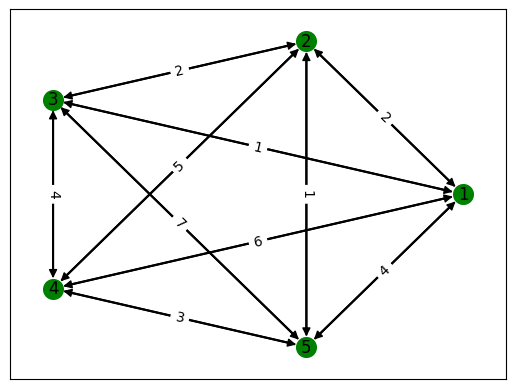

In [41]:
#загрузка матрицы из файла
with open("god_please.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
#создаём граф
graph = create_graph(matrix)

draw_graph(graph)
#отображаем граф из файла
# nt = Network(notebook = True)
# nt.from_nx(graph)
# nt.set_options(options)


Длина 4


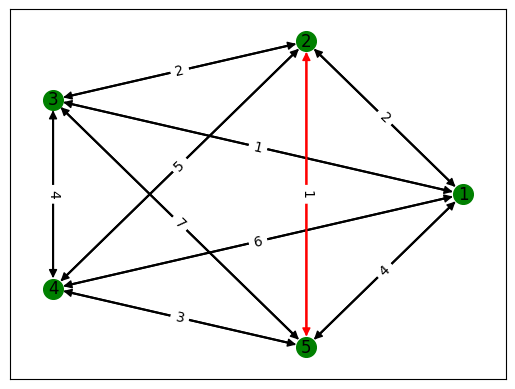

In [55]:
## Алгоритм Джонсона

def johnson(__matrix, v, u):
#Это объявление функции johnson с тремя параметрами: __matrix, v и u.
    v -= 1
    u -= 1
#Переменные v и u сдвигаются на 1, чтобы соответствовать индексам массива.

    w = copy.deepcopy(__matrix)
    matrix = copy.deepcopy(__matrix)
#Переменные w и matrix получают копии матрицы __matrix для дальнейшей обработки.

    N = len(matrix)
#Переменная N присваивается значение длины матрицы matrix.

    for i in range(N):
        w[i].append(math.inf)
#К каждой строке матрицы w добавляется бесконечность (math.inf).

    w.append([0 for i in range(N + 1)])
#Добавляется новая строка в матрицу w со значением 0 для каждого элемента.

    temp_result = bell_ford(w, 1, N + 1)
#Вызывается функция bell_ford с матрицей w, начальной точкой 1 и количеством вершин N + 1. Результат сохраняется в переменную temp_result.

    if temp_result[3] == True:
        return ([], [], [])
#Если элементы temp_result равен True, то функция возвращает пустые списки.

    for i in range(N):
        for j in range(N):
            if matrix[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                matrix[i][j] += temp_result[0][i] - temp_result[0][j]
#Для каждого элемента матрицы matrix, если он не равен бесконечности (math.inf) и соответствующие элементы temp_result также не равны бесконечности, то элементу матрицы matrix прибавляется разность элементов temp_result.

    distArr = []
    pathArr = []
#Объявляются пустые списки distArr и pathArr.

    for i in range(N):
        dijkstra_result = dijkstra(matrix, i + 1, i + 1)
        distArr.append(dijkstra_result[0])
        pathArr.append(dijkstra_result[2])
#Для каждого индекса i от 0 до N-1, вызывается функция dijkstra с матрицей matrix, начальной вершиной i+1 и конечной вершиной i+1. Результат сохраняется в переменной dijkstra_result, а его первый элемент добавляется в список distArr, а третий элемент добавляется в список pathArr.

    for i in range(N):
        for j in range(N):
            if distArr[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                distArr[i][j] += temp_result[0][j] - temp_result[0][i]
#Для каждого элемента в списке distArr, если он не равен бесконечности (math.inf) и соответствующие элементы temp_result также не равны бесконечности, то элементу прибавляется разность соответствующих элементов temp_result.

    return (distArr, [el + 1 for el in pathArr[v][u]], pathArr)
#Функция возвращает кортеж, содержащий distArr, список с элементами el + 1 из pathArr[v][u] и pathArr.

result = johnson(matrix, 2, 5)
#Вызывается функция johnson с аргументами matrix, 2 и 5. Результат сохраняется в переменную result.

path = result[1]
#Переменной path присваивается второй элемент из переменной result.

graph1 = copy.deepcopy(graph)
#Переменной graph1 присваивается глубокая копия переменной graph.

if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'
#Если длина переменной path больше 0, то для каждого индекса i от 1 до длины path, устанавливается значение 'red' для цвета узла с индексом path[i - 1] и для цвета ребра между узлами path[i - 1] и path[i]. Также, для последнего элемента path, устанавливается значение 'red' для цвета узла.

draw_graph(graph1, path)
#Вызывается функция draw_graph с аргументами graph1 и path.
print(f"Длина {result[0][0][4]}")
#Выводится строка с текстом "Длина " и значением result[0][0][4].

#отображаем граф с решением
# nt1 = Network(notebook=True)
# nt1.set_options(options)
# nt1.from_nx(graph1)
# nt1.show("test1.html")
# draw_graph(graph1, path)

In [54]:
#тестовый блок для определения скорости работы алгоритма

tests = []
# Запуск цикла для проведения 10 тестов
for i in range(10):
    # Генерируем матрицу temp_matrix
    temp_matrix = generate_matrix()
    # Определяем количество узлов в матрице (node_counts)
    node_counts = len(temp_matrix)
    edge_counts = 0
    # Запускаем цикл для прохода по элементам матрицы temp_matrix
    for i in range(len(temp_matrix)):
        # Вложенным циклом проходимся по элементам до i, чтобы избежать повторений
        for j in range(i):
            # Если элемент temp_matrix[j][i] не равен 0, увеличиваем edge_counts на 1
            if temp_matrix[j][i] != 0:
                # Запускаем таймер t1
                edge_counts += 1
    t1 = time.time()
    # Генерируем случайные значения c1 и c2
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    # Применяем алгоритм johnson к матрице temp_matrix с параметрами c1 и c2, получаем результат
    result = johnson(temp_matrix, c1, c2)
    # Завершаем таймер t2
    t2 = time.time()
    # Вычисляем разность между t2 и t1, умножаем на 1000 и округляем до целого числа для получения времени выполнения в миллисекундах (delta)
    delta = round((t2 - t1) * 1000)
    # Добавляем элемент [node_counts, edge_counts, delta] в список tests
    tests.append([node_counts, edge_counts, delta])
# Создаем DataFrame, используя список tests, и задаем названия столбцов ["Количество узлов", "Количество ребер", "Время в мс"]
pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,34,561,25
1,98,4753,616
2,34,561,31
3,67,2211,162
4,84,3486,305
5,66,2145,157
6,31,465,19
7,57,1596,97
8,44,946,49
9,97,4656,455


In [41]:
# Вывод
# Мы реализовали алгоритмы поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с заданием, проанализировали временную сложность работы заданных алгоритмов.

In [43]:
def dijkstra(__matrix, v, u):
    matrix = copy.deepcopy(__matrix)
    v -= 1
    u -= 1
    N = len(matrix)
    D = [matrix[v][i] for i in range(N)]
    D[v] = 0
    P = [[v] for i in range(N)]
    checked_nodes = {v}
    for i in range(N):
        temp_min = math.inf
        node = None
        for j in range(N):
            if D[j] < temp_min and j not in checked_nodes:
                temp_min = D[j]
                node = j
        if node is not None:
            checked_nodes.add(node)
            for k in range(N):
                if D[k] > matrix[node][k] + D[node]:
                    D[k] = matrix[node][k] + D[node]
                    P[k] = copy.deepcopy(P[node])
                    P[k].append(node)
        else:
            break

    for i in range(N):
        if D[i] != math.inf and P[i][0] != i:
            P[i].append(i)

    if D[u] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (D, path, P)

In [44]:
## Алгоритм Беллмана-Форда
def bell_ford(matrix, v, u):
    v -= 1
    u -= 1
    N = len(matrix)
    cycle = False
    A = [[math.inf for i in range(N)] for j in range(N)]
    P = [[v] for i in range(N)]
    A[0][v] = 0
    for k in range(1, N):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(N):
            for j in range(N):
                if matrix[i][j] == math.inf:
                    continue
                calculated_distance = A[k - 1][i] + matrix[i][j]
                if A[k][j] > calculated_distance:
                    A[k][j] = calculated_distance
                    P[j] = copy.deepcopy(P[i])
                    P[j].append(j)
    if A[-1] != A[-2]:
        cycle = True
    if A[-1][u] == math.inf or len(P[u]) == 1:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (A[-1], path, P, cycle)

result = bell_ford(matrix, 3, 5)
path = result[1]
